## Исследование вынужденной регулярной прецессии гироскопа

### 0 Введение

**Цель**: исследовать вынужденную прецессию гироскопа, установить зависимость скорости вынужденной прецессии от величины момента сил, действующий на ось гироскопа и сравнить ее со скоростью, рассчитанной по скорости прецессии.

**Оборудование**: гироскоп в кардановом подвесе, секундомер, набор грузов, отдельный ротор гироскопа, цилиндр известной массы, крутильный маятник, штангенциркуль, линейка.

#### Теория

В этой работе исследуется зависимость скорости прецессии гироскопа от момента силы, приложенной к его оси. Для этого к оси гироскопа подвешиваются грузы. Скорость прецессии определяется по числу оборотов рычага вокруг вертикальной оси и времени, которое на это ушло (измеряется секундомером). В процессе измерений рычаг не только поворачивается в результате прецессии гироскопа, но и опускается. Поэтому перед каждым измерением мы приподнимаем его на 5-6 градусов.

Гироскоп:

<img src="image_1.png" alt="Гироскоп" style="width:600px">

Измерение скорости прецессии гироскопа позволяет вычислить угловую скорость вращения его ротора. Расчет производится по формуле:

$$
\Omega = \frac{mgl}{I_z\omega_0}
$$

где $m$ — масса груза, $l$ — расстояние от центра карданова подвеса до точки крепления груза на оси гироскопа, $I_z$ — момент инерции гироскопа по его главной оси вращения. $\omega_0$ — частота его вращения относительно главной оси, $\Omega$ — частота прецессии.

Момент инерции ротора относительно оси симметрии $I_0$ измеряется по крутильным колебаниям точной копии ротора, подвешиваемой вдоль оси симметрии на жёсткой проволоке. Период крутильных колебаний $T_0$ зависит от момента инерции $I_0$ и модуля кручения проволоки $f$:

$$
T_0 = 2\pi\sqrt{\frac{I_0}{f}}
$$

Чтобы исключить модуль кручения проволоки, вместо ротора гироскопа к той же проволоке подвешивают цилиндр правильной формы с известными размерами и массой, для которого легко можно вычислить момент инерции $I_\text{ц}$. Для определения момента инерции ротора гироскопа имеем:

$$
I_0 = I_\text{ц}\frac{T_0^2}{T_\text{ц}^2}
$$

где $T_\text{ц}$ — период крутильных колебаний цилиндра.

Скорость вращения ротора гироскопа можно определить и не прибегая к исследованию прецессии. У используемых в работе гироскопов статор имеет две обмотки необходимые для быстрой раскрутки гироскопа. В данной работе одну обмотку используют для раскрутки гироскопа, а вторую — для измерения числа оборотов ротора. Ротор электромотора всегда немного намагничен. Вращаясь, он наводит во второй обмотке переменную ЭДС индукции, частота которой равна частоте вращения ротора. Частоту этой ЭДС можно, в частности, измерить по фигурам Лиссажу, получаемым на экране осциллографа, если на один вход подать исследуемую ЭДС, а на другой — переменное напряжение с хорошо прокалиброванного генератора. При совпадении частот на эране получаем эллипс.

Схема экспериментальной установки:

<img src="image_3.png" alt="Схема экспериментальной установки" style="width:600px">

### 

**Импорт данных и библиотек:**

### 1 Связь частоты прецессии с массой

Частота прецессии обратно пропорциональна периоду, так как изменение угла одинаково для всех измерений:
,
$$
\Omega = \dfrac{2\pi}{T}
$$

Построим зависимость частоты от массы:

In [ ]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
periods_df = pd.read_csv('periods_data.csv')

# convert to floats
for col_name in periods_df.columns:
    if not is_numeric_dtype(periods_df[col_name]):
        periods_df[col_name] = periods_df[col_name].apply(lambda s: s.replace(',', '.')).astype(float)

# round period to 3 decimal places
periods_df['T'] = periods_df['T'].apply(lambda x: round(x, 3))

periods_df

,"Масса, г",Периоды,"Время, с",T
0,57,1,173.74,173.740
1,338,4,118.49,29.622
2,268,4,148.86,37.215
3,215,2,92.88,46.440
4,173,2,115.43,57.715
5,142,2,141.05,70.525
6,93,1,106.17,106.170
7,76,1,129.76,129.760
8,60,1,165.51,165.510


In [9]:
periods_df['Omega'] = 2 * np.pi / ((periods_df['Время, с'] / periods_df['Периоды']))

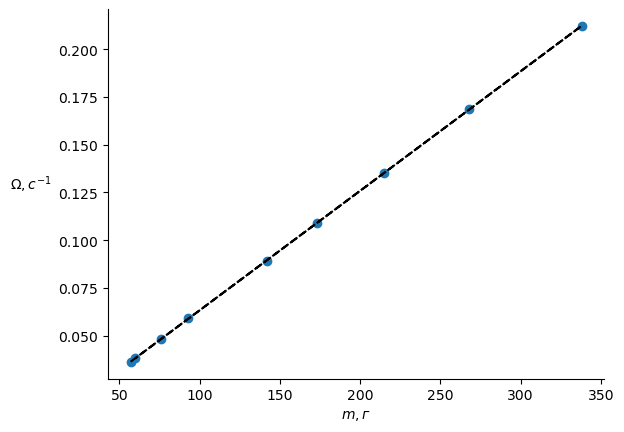

In [18]:
x = periods_df['Масса, г']
y = periods_df['Omega']

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)

# Creating the point plot
plt.scatter(x, y)

# Plotting the fitting line
plt.plot(x, fit_fn(x), '--k')

# Add labels
plt.xlabel('$m, г$')
plt.ylabel('$\\Omega, с^{-1}$', rotation=0, labelpad=20)

# Display the plot
sns.despine()
plt.show()

Погрешность рассчитываем по формуле (они довольно малы, поэтому не отображаем их на графике):

$$
\sigma_\Omega^\text{сист} = \Omega \varepsilon_T
$$

In [34]:
periods_df

,"Масса, г",Периоды,"Время, с",T,Omega
0,57,1,173.74,173.740,0.036164
1,338,4,118.49,29.622,0.212109
2,268,4,148.86,37.215,0.168835
3,215,2,92.88,46.440,0.135297
4,173,2,115.43,57.715,0.108866
5,142,2,141.05,70.525,0.089092
6,93,1,106.17,106.170,0.059180
7,76,1,129.76,129.760,0.048422
8,60,1,165.51,165.510,0.037963


In [38]:
import math

def count_decimal_places(value):
    if value == 0:
        return 0
    return -int(math.floor(math.log10(abs(value)))) + 1

In [40]:
for i, omega in enumerate(periods_df['Omega']):
    print(f'Груз №{i+1}:')
    decimal_places = count_decimal_places(omega * 0.01 * 100)
    print(f'{omega * 100:.{decimal_places}f} +- {omega * 0.01 * 100:.1g} * 10^-2 * с^-1')
    print('-----')

Груз №1:
3.616 +- 0.04 * 10^-2 * с^-1
-----
Груз №2:
21.21 +- 0.2 * 10^-2 * с^-1
-----
Груз №3:
16.88 +- 0.2 * 10^-2 * с^-1
-----
Груз №4:
13.53 +- 0.1 * 10^-2 * с^-1
-----
Груз №5:
10.89 +- 0.1 * 10^-2 * с^-1
-----
Груз №6:
8.909 +- 0.09 * 10^-2 * с^-1
-----
Груз №7:
5.918 +- 0.06 * 10^-2 * с^-1
-----
Груз №8:
4.842 +- 0.05 * 10^-2 * с^-1
-----
Груз №9:
3.796 +- 0.04 * 10^-2 * с^-1
-----


### 2 Момент инерции ротора гироскопа 

In [8]:
# Calculated in Excel
# TODO: to Python for reproducibility

Погрешность момента инерции:

$\sigma_{I_0} = I_0\cdot\sqrt{\varepsilon_{I_\text{ц}}^2+ 4\varepsilon_{T_0}^2+ 4\varepsilon_{T_\text{ц}}^2 } \approx 0,03$ кг$\cdot \text{м}^2$

Итого, момент инерции ротора гироскопа:

$I_0 = (0,80\pm 0,03)$ кг$\cdot \text{м}^2$

####  Выводы

1) Связь частоты прецессии с массой удалось выявить. Методом МНК была построена прямая, показывающая прямую пропорциональность, на неё легли все точки. Погрешность измерений частоты оказалась небольшой.

2) Момент инерции ротора гироскопа получился в адекватном диапазоне: $I_0 = (0,80\pm 0,03)$ кг$\cdot \text{м}^2$

3) Мы наконец-то научились правильно округлять!!!